In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from keras import Model
from keras.layers import Input, Conv2D, Activation, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout, Concatenate, Add
from keras.optimizers import Adam
from ipywidgets import interact
import ipywidgets as widgets
from keras.initializers import RandomNormal
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
import keras
from sklearn.linear_model import LinearRegression
from keras.utils import plot_model
import tensorflow

In [2]:
ls

'#2 DL Feature Engeneering.ipynb'
'#2 DL Model Capstone 2 HED.ipynb'
'#2 DL Model Capstone 2.ipynb'
'#2 DL Model Capstone 2 v2_left_and_right_image-Copy1.ipynb'
'#2 DL Model Capstone 2 v2_left_and_right_image.ipynb'
'#2 DL Model Capstone 2 v2_left_image.ipynb'
'#2 DL Model Capstone 2 v2-right_Image.ipynb'
'#2 DL Model Capstone 2 v3_AE_left_image.ipynb'
 model.png
 ThinSectionAE_features_deep-model-01-0.0399-0.0286.hdf5
 ThinSectionAE_features_deep-model-01-0.0466-0.0440.hdf5
 ThinSectionAE_features_deep-model-01-0.0469-0.0443.hdf5
 ThinSectionAE_features_deep-model-02-0.0265-0.0250.hdf5
 ThinSectionAE_features_deep-model-02-0.0434-0.0433.hdf5
 ThinSectionAE_features_deep-model-02-0.0436-0.0437.hdf5
 ThinSectionAE_features_deep-model-03-0.0242-0.0236.hdf5
 ThinSectionAE_features_deep-model-03-0.0428-0.0428.hdf5
 ThinSectionAE_features_deep-model-03-0.0432-0.0431.hdf5
 ThinSectionAE_features_deep-model-04-0.0428-0.0431.hdf5
 ThinSectionAE_features_deep-model-05-0.0227-0.0225.hdf5
 ThinSe

In [3]:
pwd

'/bdata/bdata1/ldata/olgabrus/ThinSections/Step 2. Data Science'

In [4]:
dir_path = '../Step 1. Data Wrangling/'

In [5]:
df_wellA = pd.read_csv(dir_path+'DATA_for_DL_Well_A_data.csv')
df_wellA

,Unnamed: 0,"Depth, m","Porosity, pc",File Name
0,0,3837.55,10.8,15_9_19_A\15_9_19_A_p2_3837.55.png
1,1,3838.50,17.2,15_9_19_A\15_9_19_A_p2_3838.50.png
2,2,3839.40,12.7,15_9_19_A\15_9_19_A_p3_3839.40.png
3,3,3840.45,21.0,15_9_19_A\15_9_19_A_p3_3840.45.png
4,4,3841.45,22.1,15_9_19_A\15_9_19_A_p4_3841.45.png
...,...,...,...,...
147,147,3995.50,18.2,15_9_19_A\15_9_19_A_p79_3995.50.png
148,148,3996.40,15.7,15_9_19_A\15_9_19_A_p79_3996.40.png
149,149,3997.50,11.7,15_9_19_A\15_9_19_A_p80_3997.50.png
150,150,3998.45,15.4,15_9_19_A\15_9_19_A_p80_3998.45.png


In [6]:
X_dataAleft=[]
X_dataAright=[]
y_dataA=[]
for ind in df_wellA.index:
    y_dataA.append(df_wellA['Porosity, pc'][ind])
    im_left = Image.open((dir_path+df_wellA['File Name'][ind][:-4]).replace('\\','/')+'_left.jpg')
    im_right = Image.open((dir_path+df_wellA['File Name'][ind][:-4]).replace('\\','/')+'_right.jpg')
    X_dataAleft.append(np.array(im_left))
    X_dataAright.append(np.array(im_right))
    #print(ind,df_wellA['Porosity, pc'][ind],df_wellA['File Name'][ind])

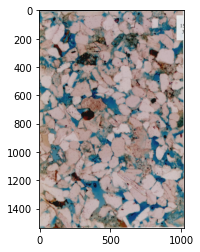

In [7]:
plt.imshow(np.array(X_dataAleft)[10,:,:,:])

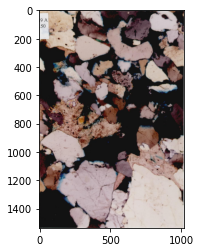

In [8]:
plt.imshow(np.array(X_dataAright)[1,:,:,:])

In [9]:
y_dataA=np.array(y_dataA)/36
y_dataA.shape

(152,)

In [10]:
X_dataAleft=np.array(X_dataAleft)/255
X_dataAleft.shape

(152, 1536, 1024, 3)

In [11]:
X_dataAright=np.array(X_dataAright)/255
X_dataAright.shape

(152, 1536, 1024, 3)

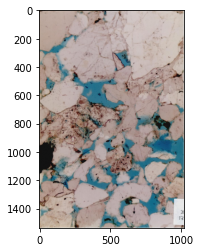

In [12]:
plt.imshow(np.flip(X_dataAleft,axis=1)[1,:,:,:])

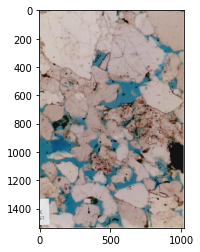

In [13]:
plt.imshow(np.flip(np.flip(X_dataAleft,axis=1),axis=2)[1,:,:,:])

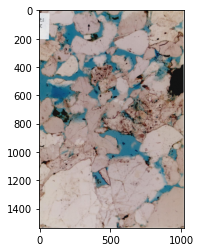

In [14]:
plt.imshow(np.flip(X_dataAleft,axis=2)[1,:,:,:])

In [15]:
X_dataAleft=np.concatenate((X_dataAleft,np.flip(X_dataAleft,axis=1),np.flip(X_dataAleft,axis=2),np.flip(np.flip(X_dataAleft,axis=1),axis=2)),axis=0)
y_dataA=np.concatenate((y_dataA,y_dataA,y_dataA,y_dataA),axis=0)
print(X_dataAleft.shape)
print(y_dataA.shape)

(608, 1536, 1024, 3)
(608,)


In [16]:
X_dataAright=np.concatenate((X_dataAright,np.flip(X_dataAright,axis=1),np.flip(X_dataAright,axis=2),np.flip(np.flip(X_dataAright,axis=1),axis=2)),axis=0)
print(X_dataAright.shape)

(608, 1536, 1024, 3)


In [17]:
def plot_thin_section(item):
    
    fig, ax = plt.subplots(1,2,figsize=(5, 5),frameon=False)
    
    plt.title('Porosity # '+str(round(y_dataA[item],2)))
    ax[0].imshow((X_dataAleft[item,:,:,:])
    ax[1].imshow(X_dataAright[item,:,:,:])

SyntaxError: invalid syntax (<ipython-input-17-685453c87bb7>, line 7)

In [ ]:
sliders_item = widgets.IntSlider(min=0, max=X_dataAleft.shape[0], step=1, value=0, description='Item # ')
interact(plot_thin_section, item=sliders_item)

In [18]:
X_trainleft, X_testleft, X_trainright, X_testright, y_train, y_test = train_test_split(X_dataAleft, X_dataAright, y_dataA, test_size=0.10, random_state=42)
print(X_trainleft.shape)
print(X_testleft.shape)
print(X_trainright.shape)
print(X_testright.shape)
print(y_train.shape)
print(y_test.shape)

(547, 1536, 1024, 3)
(61, 1536, 1024, 3)
(547, 1536, 1024, 3)
(61, 1536, 1024, 3)
(547,)
(61,)


In [23]:
keras.backend.clear_session()
# define an encoder block
def define_encoder_block(layer_in, n_filters, stride=(2,2), batchnorm=True):
    
    # weight initialization
    init = RandomNormal(stddev=0.02)
    
    # add downsampling layer
    g = Conv2D(n_filters, (2,2), strides=stride, padding='same', kernel_initializer=init)(layer_in)
    
    g = MaxPooling2D()(g)
    
    # conditionally add batch normalization
    if batchnorm:
        g = BatchNormalization()(g, training=True)
    
    
    # leaky relu activation
    #g = LeakyReLU(alpha=0.2)(g)
    g = Activation('relu')(g)
    
    return g
 
 
    
# define the standalone generator model
def define_generator(image_shape):
    
    # weight initialization
    init = RandomNormal(stddev=0.02)
    
    # image input
    in_imageLeft = Input(shape=image_shape)
    in_imageRight = Input(shape=image_shape)
    
    # encoder model
    e1L = define_encoder_block(in_imageLeft, 64, stride=(3,2), batchnorm=False)
    e2L = define_encoder_block(e1L, 128)
    e3L = define_encoder_block(e2L, 256)
    e4L = define_encoder_block(e3L, 256)

    # encoder model
    e1R = define_encoder_block(in_imageRight, 64, stride=(3,2), batchnorm=False)
    e2R = define_encoder_block(e1R, 128)
    e3R = define_encoder_block(e2R, 256)
    e4R = define_encoder_block(e3R, 256)

    # define model
    modelLeft = Model(in_imageLeft, e4L)
    modelRight = Model(in_imageRight, e4R)
    
    combined = Add()([modelLeft.output, modelRight.output])

    # bottleneck, no batch norm and relu
    b = Conv2D(512, (2,2), strides=(2,2), padding='same', kernel_initializer=init)(combined)
    b = Activation('relu')(b)
    
    # bottleneck, no batch norm and relu
    #bL = Conv2D(512, (2,2), strides=(2,2), padding='same', kernel_initializer=init)(e4L)
    #bL = Activation('relu')(bL)

    # bottleneck, no batch norm and relu
    #bR = Conv2D(512, (2,2), strides=(2,2), padding='same', kernel_initializer=init)(e4R)
    #bR = Activation('relu')(bR)

    x = Flatten()(b)
    x = Dense(128)(x)
    x = Activation("relu")(x)
    x = BatchNormalization()(x)
    x = Dropout(0.25)(x)
    
    #xL = Flatten()(bL)
    #xL = Dense(128)(xL)
    #xL = Activation("relu")(xL)
    #xL = BatchNormalization()(xL)
    #xL = Dropout(0.25)(xL)

    #xR = Flatten()(bR)
    #xR = Dense(128)(xR)
    #xR = Activation("relu")(xR)
    #xR = BatchNormalization()(xR)
    #xR = Dropout(0.25)(xR)

    # apply another FC layer, this one to match the number of nodes
    # coming out of the MLP
    x = Dense(64)(x)
    x = Activation("relu")(x)
    x = BatchNormalization()(x)
    x = Dropout(0.25)(x)
    
    # apply another FC layer, this one to match the number of nodes
    # coming out of the MLP
    #xL = Dense(64)(xL)
    #xL = Activation("relu")(xL)
    #xL = BatchNormalization()(xL)
    #xL = Dropout(0.25)(xL)

    # apply another FC layer, this one to match the number of nodes
    # coming out of the MLP
    #xR = Dense(64)(xR)
    #xR = Activation("relu")(xR)
    #xR = BatchNormalization()(xR)
    #xR = Dropout(0.25)(xR)
    
    
    # check to see if the regression node should be added
    #if regress:
        #x = Dense(1, activation="linear")(x)
    #out_imageLeft = Dense(1, activation="sigmoid")(xL)
    #out_imageRight = Dense(1, activation="sigmoid")(xR)
    

    
    #combined = Add()([modelLeft.output, modelRight.output])

    z = Dense(1, activation="sigmoid")(x)
    
    # our model will accept the inputs of the two branches and
    # then output a single value
    model = Model(inputs=[modelLeft.input, modelRight.input], outputs=z)
    
    return model

In [28]:
keras.backend.clear_session()
# define input shape based on the loaded dataset
image_shape = X_trainleft[0].shape

g_model = define_generator(image_shape)

# compile model
opt = Adam(lr=0.001, beta_1=0.5)

g_model.compile(loss='mean_absolute_percentage_error', optimizer=opt, metrics=['mse']) #, 'mae', 'mean_absolute_percentage_error'

In [29]:
g_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1536, 1024, 3 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 1536, 1024, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 512, 512, 64) 832         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 512, 512, 64) 832         input_2[0][0]                    
____________________________________________________________________________________________

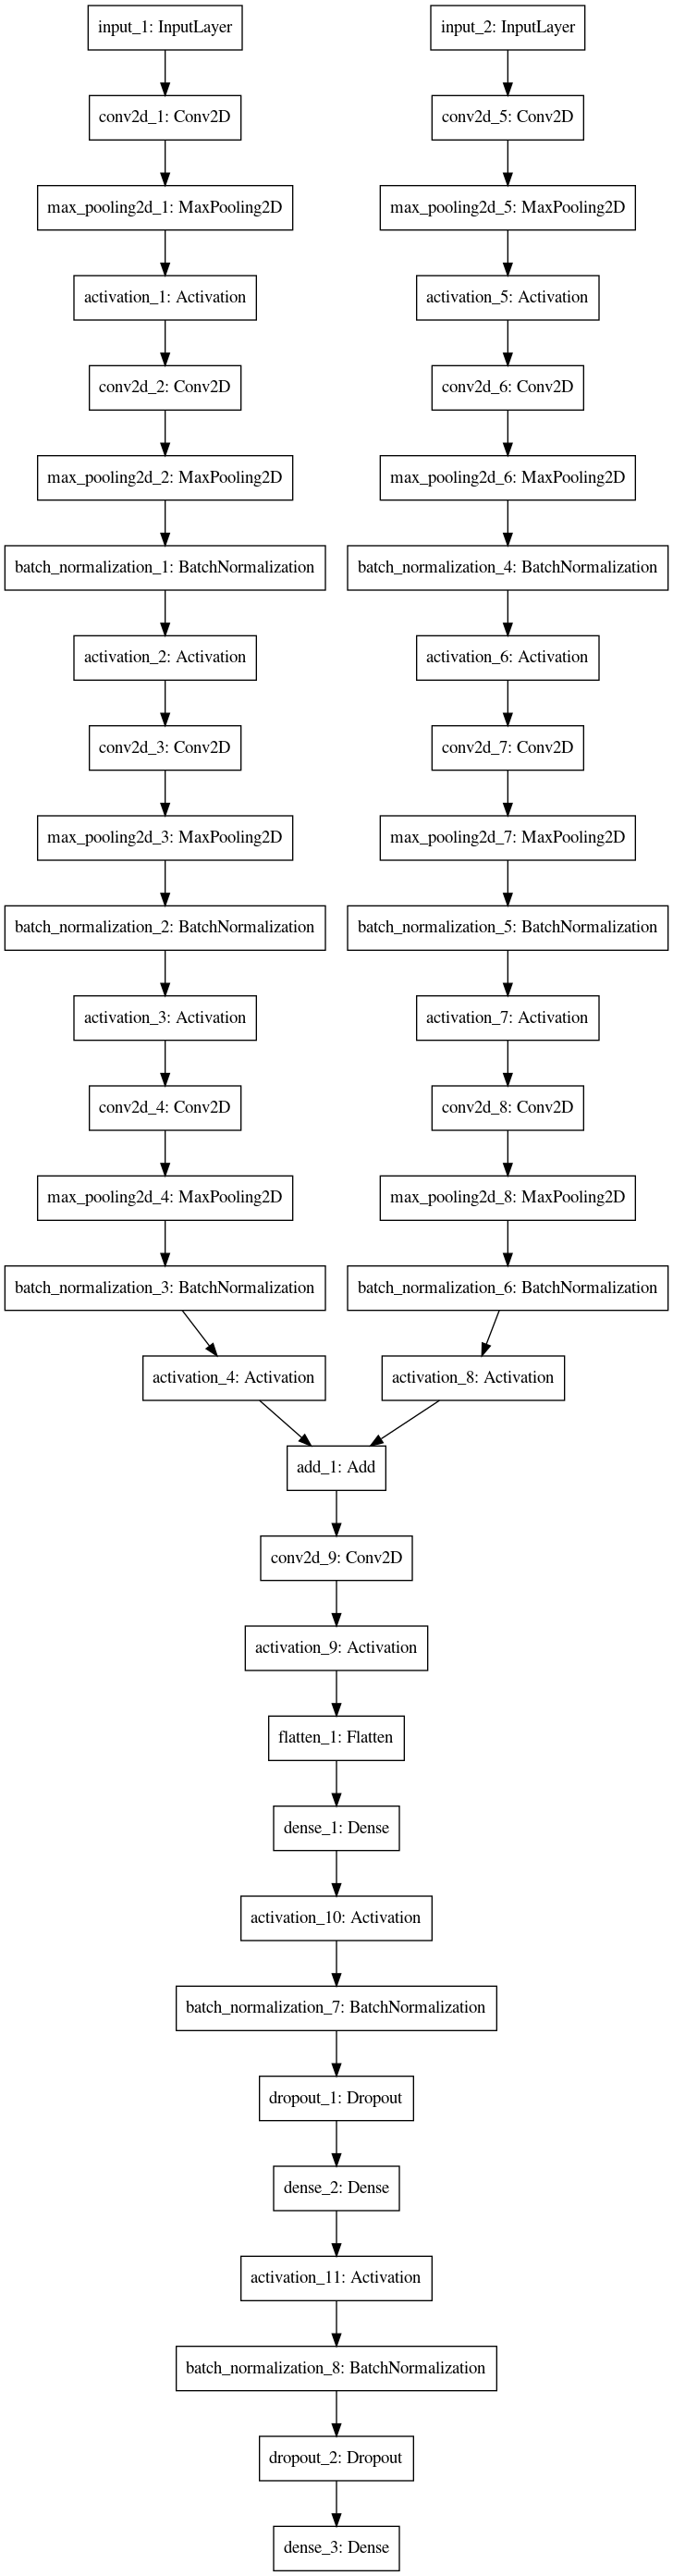

In [30]:
plot_model(g_model)

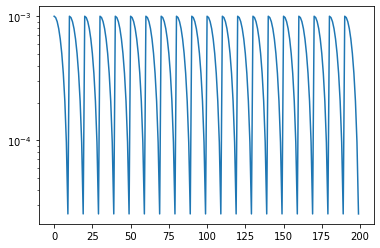

In [31]:
def schedule(epoch, lr, lr_min=0.000001,lr_max=0.001,max_epoch=200,period=10,alpha=0.):


    t = epoch % period
        
    #Within the i-th run, we decay the learning rate with a cosine annealing for each batch as follows:
        
    cosine_decay = lr_min + 0.5 * (lr_max - lr_min) * (1 + np.cos(np.pi * t / period))
    decayed = (1 - alpha) * cosine_decay + alpha
        
    return decayed

lr=[]
epoch=[]
for i in range(200):

    lr.append(schedule(i, lr=0))
    epoch.append(i)
    
plt.plot(epoch,lr)
plt.yscale('log')

In [34]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
filepath = "ThinSectionAE_left_right-model-{epoch:02d}-{loss:.4f}-{val_loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min',period=1)
lr_scheduler = tensorflow.keras.callbacks.LearningRateScheduler(schedule, verbose=1)

history = g_model.fit([X_trainleft,X_trainright], y_train,
          epochs=200,
          batch_size=32,
          shuffle=True,
          verbose=1,
          validation_data=([X_testleft,X_testright], y_test),
          callbacks=[checkpoint,lr_scheduler,es])

Train on 547 samples, validate on 61 samples
Epoch 1/200

Epoch 00001: LearningRateScheduler reducing learning rate to 0.001.
547/547 [==============================] - 150s 274ms/step - loss: 70.2002 - mse: 0.0935 - val_loss: 107.2028 - val_mse: 0.1465

Epoch 00001: val_loss improved from inf to 107.20277, saving model to ThinSectionAE_left_right-model-01-70.2002-107.2028.hdf5
Epoch 2/200

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0009755527298894294.
547/547 [==============================] - 173s 317ms/step - loss: 51.9834 - mse: 0.0642 - val_loss: 96.4266 - val_mse: 0.1132

Epoch 00002: val_loss improved from 107.20277 to 96.42662, saving model to ThinSectionAE_left_right-model-02-51.9834-96.4266.hdf5
Epoch 3/200

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0009046039886902864.
547/547 [==============================] - 193s 352ms/step - loss: 49.7821 - mse: 0.0579 - val_loss: 38.6693 - val_mse: 0.0583

Epoch 00003: val_loss improved from 96.

547/547 [==============================] - 451s 825ms/step - loss: 31.0348 - mse: 0.0286 - val_loss: 24.3037 - val_mse: 0.0186

Epoch 00029: val_loss improved from 25.16214 to 24.30371, saving model to ThinSectionAE_left_right-model-29-31.0348-24.3037.hdf5
Epoch 30/200

Epoch 00030: LearningRateScheduler reducing learning rate to 2.5447270110570814e-05.
547/547 [==============================] - 451s 824ms/step - loss: 28.2964 - mse: 0.0244 - val_loss: 23.2375 - val_mse: 0.0174

Epoch 00030: val_loss improved from 24.30371 to 23.23749, saving model to ThinSectionAE_left_right-model-30-28.2964-23.2375.hdf5
Epoch 31/200

Epoch 00031: LearningRateScheduler reducing learning rate to 0.001.
547/547 [==============================] - 451s 824ms/step - loss: 32.0845 - mse: 0.0273 - val_loss: 48.1322 - val_mse: 0.0377

Epoch 00031: val_loss did not improve from 23.23749
Epoch 32/200

Epoch 00032: LearningRateScheduler reducing learning rate to 0.0009755527298894294.
547/547 [==================

547/547 [==============================] - 462s 845ms/step - loss: 20.9263 - mse: 0.0144 - val_loss: 53.3636 - val_mse: 0.0942

Epoch 00057: val_loss did not improve from 22.31548
Epoch 58/200

Epoch 00058: LearningRateScheduler reducing learning rate to 0.00020690126647990973.
547/547 [==============================] - 460s 841ms/step - loss: 20.3996 - mse: 0.0133 - val_loss: 41.9644 - val_mse: 0.0587

Epoch 00058: val_loss did not improve from 22.31548
Epoch 59/200

Epoch 00059: LearningRateScheduler reducing learning rate to 9.639601130971382e-05.
547/547 [==============================] - 465s 850ms/step - loss: 21.6744 - mse: 0.0140 - val_loss: 34.2039 - val_mse: 0.0402

Epoch 00059: val_loss did not improve from 22.31548
Epoch 60/200

Epoch 00060: LearningRateScheduler reducing learning rate to 2.5447270110570814e-05.
547/547 [==============================] - 466s 851ms/step - loss: 20.7550 - mse: 0.0134 - val_loss: 29.9521 - val_mse: 0.0318

Epoch 00060: val_loss did not improv

547/547 [==============================] - 452s 826ms/step - loss: 19.4079 - mse: 0.0129 - val_loss: 27.2043 - val_mse: 0.0270

Epoch 00086: val_loss did not improve from 21.38409
Epoch 87/200

Epoch 00087: LearningRateScheduler reducing learning rate to 0.0003461460113097139.
547/547 [==============================] - 453s 828ms/step - loss: 17.5772 - mse: 0.0117 - val_loss: 23.0716 - val_mse: 0.0188

Epoch 00087: val_loss did not improve from 21.38409
Epoch 88/200

Epoch 00088: LearningRateScheduler reducing learning rate to 0.00020690126647990973.
547/547 [==============================] - 455s 832ms/step - loss: 18.3092 - mse: 0.0112 - val_loss: 23.0503 - val_mse: 0.0188

Epoch 00088: val_loss did not improve from 21.38409
Epoch 89/200

Epoch 00089: LearningRateScheduler reducing learning rate to 9.639601130971382e-05.
547/547 [==============================] - 458s 837ms/step - loss: 15.8944 - mse: 0.0098 - val_loss: 22.8254 - val_mse: 0.0186

Epoch 00089: val_loss did not improve

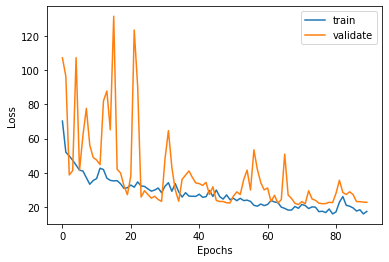

In [35]:
# plot training history
plt.plot(g_model.history.history['loss'], label='train')
plt.plot(g_model.history.history['val_loss'], label='validate')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.title('Learning_rate=Variable')
plt.legend()
plt.show()

coefficient of determination: 0.6740449432662914


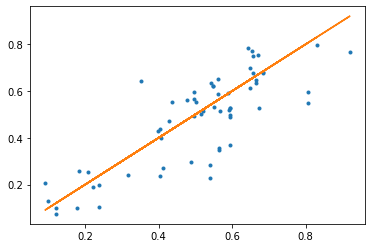

In [36]:
model = load_model('ThinSectionAE_left_right-model-70-19.1827-21.3841.hdf5') #dropout=0.5, max pooling added, lr -.001, filter (2,2) , mpe, batch size 8
X_test_predict = model.predict([X_testleft,X_testright])
plt.plot(y_test,X_test_predict,'.')
plt.plot(y_test,y_test,'-')
linear = LinearRegression()
linear.fit(y_test.reshape(X_test_predict.shape[0],X_test_predict.shape[1]),X_test_predict.reshape(X_test_predict.shape[0],X_test_predict.shape[1]))
r_sq = linear.score(y_test.reshape(X_test_predict.shape[0],X_test_predict.shape[1]),X_test_predict.reshape(X_test_predict.shape[0],X_test_predict.shape[1]))
print('coefficient of determination:', r_sq)

### Tuning Learning rate

In [ ]:
epochs = np.array(range(10))
x= 1e-8 * 10**(epochs)
plt.semilogy(epochs,x)
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')

In [ ]:
lr_scheduler = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch))

history = g_model.fit([X_trainleft,X_trainright], y_train,
          epochs=10,
          batch_size=32,
          shuffle=True,
          verbose=1,
          validation_data=([X_testleft,X_testright], y_test),
          callbacks=[lr_scheduler])

In [ ]:
# plot training history
plt.plot(g_model.history.history['loss'], label='train')
plt.plot(g_model.history.history['val_loss'], label='validate')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.title('Learning_rate=Variable')
plt.legend()
plt.show()

### Testing 

In [37]:
df_wellbt2 = pd.read_csv(dir_path+'DATA_for_DL-Well_bt2_data.csv')
df_wellbt2

,Unnamed: 0,"Depth, m","Porosity, pc",File Name
0,0,4037.75,21.1,15_9_19_bt2\15_9_19_bt2_p2_4037.75.png
1,1,4038.75,21.7,15_9_19_bt2\15_9_19_bt2_p2_4038.75.png
2,2,4039.75,19.9,15_9_19_bt2\15_9_19_bt2_p3_4039.75.png
3,3,4040.75,21.8,15_9_19_bt2\15_9_19_bt2_p3_4040.75.png
4,4,4041.75,20.9,15_9_19_bt2\15_9_19_bt2_p4_4041.75.png
...,...,...,...,...
61,61,4103.75,24.3,15_9_19_bt2\15_9_19_bt2_p33_4103.75.png
62,62,4104.75,24.0,15_9_19_bt2\15_9_19_bt2_p33_4104.75.png
63,63,4105.80,15.4,15_9_19_bt2\15_9_19_bt2_p34_4105.80.png
64,64,4106.45,15.5,15_9_19_bt2\15_9_19_bt2_p34_4106.45.png


In [38]:
X_databt2Left=[]
X_databt2Right=[]
y_databt2=[]
for ind in df_wellbt2.index:
    y_databt2.append(df_wellbt2['Porosity, pc'][ind])
    imLeft = Image.open((dir_path+df_wellbt2['File Name'][ind][:-4]).replace('\\','/')+'_left.jpg')
    X_databt2Left.append(np.array(imLeft))
    imRight = Image.open((dir_path+df_wellbt2['File Name'][ind][:-4]).replace('\\','/')+'_right.jpg')
    X_databt2Right.append(np.array(imRight))
    #print(ind,df_wellA['Porosity, pc'][ind],df_wellA['File Name'][ind])

In [39]:
y_databt2=np.array(y_databt2)/36
y_databt2.shape

(66,)

In [40]:
X_databt2Left=np.array(X_databt2Left)/255
X_databt2Left.shape

(66, 1536, 1024, 3)

In [41]:
X_databt2Right=np.array(X_databt2Right)/255
X_databt2Right.shape

(66, 1536, 1024, 3)

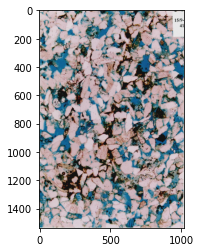

In [42]:
plt.imshow(X_databt2Left[60,:,:,:])

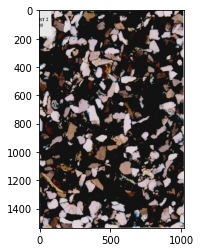

In [43]:
plt.imshow(X_databt2Right[60,:,:,:])

coefficient of determination: 0.39051265359197596


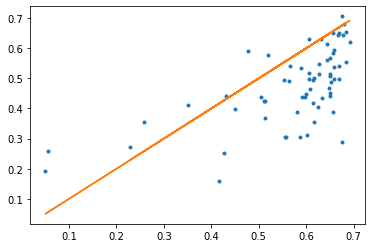

In [44]:
model = load_model('ThinSectionAE_left_right-model-70-19.1827-21.3841.hdf5') #max pooling added, lr -.001, filter (2,2), mpe
X_databt2_predict = model.predict([X_databt2Left,X_databt2Right])
plt.plot(y_databt2,X_databt2_predict,'.')
plt.plot(y_databt2,y_databt2,'-')
linear = LinearRegression()
linear.fit(y_databt2.reshape(X_databt2_predict.shape[0],X_databt2_predict.shape[1]),X_databt2_predict.reshape(X_databt2_predict.shape[0],X_databt2_predict.shape[1]))
r_sq = linear.score(y_databt2.reshape(X_databt2_predict.shape[0],X_databt2_predict.shape[1]),X_databt2_predict.reshape(X_databt2_predict.shape[0],X_databt2_predict.shape[1]))
print('coefficient of determination:', r_sq)

### Training on both datasets

In [45]:
X_databt2Left=np.concatenate((X_databt2Left,np.flip(X_databt2Left,axis=1),np.flip(X_databt2Left,axis=2),np.flip(np.flip(X_databt2Left,axis=1),axis=2)),axis=0)
X_databt2Right=np.concatenate((X_databt2Right,np.flip(X_databt2Right,axis=1),np.flip(X_databt2Right,axis=2),np.flip(np.flip(X_databt2Right,axis=1),axis=2)),axis=0)
y_databt2=np.concatenate((y_databt2,y_databt2,y_databt2,y_databt2),axis=0)
print(X_databt2Left.shape)
print(X_databt2Right.shape)
print(y_databt2.shape)

(264, 1536, 1024, 3)
(264, 1536, 1024, 3)
(264,)


In [46]:
X_dataLeft = np.concatenate((X_dataAleft,X_databt2Left),axis=0)
X_dataRight = np.concatenate((X_dataAright,X_databt2Right),axis=0)
y_data = np.concatenate((y_dataA,y_databt2),axis=0)
print(X_dataLeft.shape)
print(X_dataRight.shape)
print(y_data.shape)

(872, 1536, 1024, 3)
(872, 1536, 1024, 3)
(872,)


In [48]:
keras.backend.clear_session()

In [50]:
del X_dataAleft, X_databt2Left, X_dataAright, X_databt2Right

In [51]:
X_trainLeft, X_testLeft, X_trainRight, X_testRight, y_train, y_test = train_test_split(X_dataLeft, X_dataRight, y_data, test_size=0.10, random_state=42)
print(X_trainLeft.shape)
print(X_testLeft.shape)
print(X_trainRight.shape)
print(X_testRight.shape)
print(y_train.shape)
print(y_test.shape)

(784, 1536, 1024, 3)
(88, 1536, 1024, 3)
(784, 1536, 1024, 3)
(88, 1536, 1024, 3)
(784,)
(88,)


In [52]:
del X_dataLeft, X_dataRight

In [53]:
keras.backend.clear_session()
# define input shape based on the loaded dataset
image_shape = X_trainLeft[0].shape

g_model = define_generator(image_shape)

# compile model
opt = Adam(lr=0.001, beta_1=0.5)

g_model.compile(loss='mean_absolute_percentage_error', optimizer=opt, metrics=['mse']) #, 'mae', 'mean_absolute_percentage_error

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
filepath = "ThinSectionAE_left-2wells-model-{epoch:02d}-{loss:.4f}-{val_loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min',period=1)
lr_scheduler = tensorflow.keras.callbacks.LearningRateScheduler(schedule, verbose=1)

history = g_model.fit([X_trainLeft,X_trainRight], y_train,
          epochs=200,
          batch_size=32,
          shuffle=True,
          verbose=1,
          validation_data=([X_testLeft,X_testRight], y_test),
          callbacks=[checkpoint,lr_scheduler,es])

Train on 784 samples, validate on 88 samples
Epoch 1/200

Epoch 00001: LearningRateScheduler reducing learning rate to 0.001.
784/784 [==============================] - 240s 306ms/step - loss: 58.7372 - mse: 0.0754 - val_loss: 146.6528 - val_mse: 0.2029

Epoch 00001: val_loss improved from inf to 146.65276, saving model to ThinSectionAE_left-2wells-model-01-58.7372-146.6528.hdf5
Epoch 2/200

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0009755527298894294.
784/784 [==============================] - 137s 175ms/step - loss: 43.7945 - mse: 0.0522 - val_loss: 142.3797 - val_mse: 0.2080

Epoch 00002: val_loss improved from 146.65276 to 142.37973, saving model to ThinSectionAE_left-2wells-model-02-43.7945-142.3797.hdf5
Epoch 3/200

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0009046039886902864.
784/784 [==============================] - 137s 175ms/step - loss: 41.3516 - mse: 0.0481 - val_loss: 89.9485 - val_mse: 0.2419

Epoch 00003: val_loss improved fro

784/784 [==============================] - 136s 173ms/step - loss: 21.7048 - mse: 0.0138 - val_loss: 30.2544 - val_mse: 0.0231

Epoch 00028: val_loss did not improve from 26.58964
Epoch 29/200

Epoch 00029: LearningRateScheduler reducing learning rate to 9.639601130971382e-05.
784/784 [==============================] - 138s 176ms/step - loss: 21.4748 - mse: 0.0142 - val_loss: 30.5624 - val_mse: 0.0230

Epoch 00029: val_loss did not improve from 26.58964
Epoch 30/200

Epoch 00030: LearningRateScheduler reducing learning rate to 2.5447270110570814e-05.
784/784 [==============================] - 136s 174ms/step - loss: 22.0965 - mse: 0.0137 - val_loss: 30.0688 - val_mse: 0.0229

Epoch 00030: val_loss did not improve from 26.58964
Epoch 31/200

Epoch 00031: LearningRateScheduler reducing learning rate to 0.001.
784/784 [==============================] - 135s 173ms/step - loss: 23.4799 - mse: 0.0144 - val_loss: 27.8242 - val_mse: 0.0243

Epoch 00031: val_loss did not improve from 26.58964
E


Epoch 00057: val_loss did not improve from 25.41110
Epoch 58/200

Epoch 00058: LearningRateScheduler reducing learning rate to 0.00020690126647990973.
784/784 [==============================] - 139s 178ms/step - loss: 13.7716 - mse: 0.0056 - val_loss: 31.9013 - val_mse: 0.0230

Epoch 00058: val_loss did not improve from 25.41110
Epoch 59/200

Epoch 00059: LearningRateScheduler reducing learning rate to 9.639601130971382e-05.
784/784 [==============================] - 134s 171ms/step - loss: 14.1155 - mse: 0.0058 - val_loss: 31.5594 - val_mse: 0.0227

Epoch 00059: val_loss did not improve from 25.41110
Epoch 60/200

Epoch 00060: LearningRateScheduler reducing learning rate to 2.5447270110570814e-05.
784/784 [==============================] - 130s 166ms/step - loss: 13.1987 - mse: 0.0050 - val_loss: 30.4966 - val_mse: 0.0223

Epoch 00060: val_loss did not improve from 25.41110
Epoch 61/200

Epoch 00061: LearningRateScheduler reducing learning rate to 0.001.
784/784 [====================

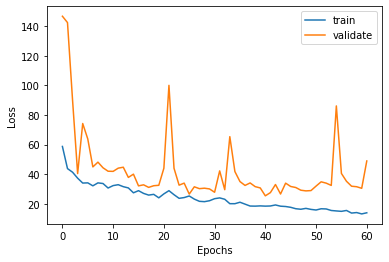

In [54]:
# plot training history
plt.plot(g_model.history.history['loss'], label='train')
plt.plot(g_model.history.history['val_loss'], label='validate')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.title('Learning_rate=Variable')
plt.legend()
plt.show()

coefficient of determination: 0.5302886024225634


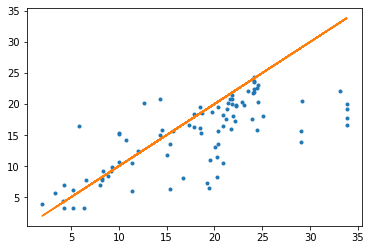

In [56]:
model = load_model('ThinSectionAE_left-2wells-model-41-18.4517-25.4111.hdf5') #max pooling added, lr -.001, filter (2,2), mpe
X_test_predict = model.predict([X_testLeft,X_testRight])
plt.plot(y_test*36,X_test_predict*36,'.')
plt.plot(y_test*36,y_test*36,'-')
linear = LinearRegression()
linear.fit(y_test.reshape(X_test_predict.shape[0],X_test_predict.shape[1])*36,X_test_predict.reshape(X_test_predict.shape[0],X_test_predict.shape[1])*36)
r_sq = linear.score(y_test.reshape(X_test_predict.shape[0],X_test_predict.shape[1])*36,X_test_predict.reshape(X_test_predict.shape[0],X_test_predict.shape[1])*36)
print('coefficient of determination:', r_sq)

(array([1., 0., 0., 0., 1., 0., 1., 2., 0., 0., 2., 0., 1., 1., 1., 0., 0.,
        0., 1., 2., 1., 1., 2., 0., 0., 3., 0., 1., 0., 2., 0., 1., 0., 1.,
        0., 0., 0., 0., 2., 1., 1., 0., 2., 1., 0., 0., 1., 0., 1., 0., 2.,
        2., 2., 0., 2., 2., 1., 5., 0., 3., 2., 3., 4., 3., 0., 1., 1., 1.,
        1., 6., 3., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 4.]),
 array([0.05555556, 0.06438889, 0.07322222, 0.08205556, 0.09088889,
        0.09972222, 0.10855556, 0.11738889, 0.12622222, 0.13505556,
        0.14388889, 0.15272222, 0.16155556, 0.17038889, 0.17922222,
        0.18805556, 0.19688889, 0.20572222, 0.21455556, 0.22338889,
        0.23222222, 0.24105556, 0.24988889, 0.25872222, 0.26755556,
        0.27638889, 0.28522222, 0.29405556, 0.30288889, 0.31172222,
        0.32055556, 0.32938889, 0.33822222, 0.34705556, 0.35588889,
        0.36472222, 0.37355556, 0.38238889, 0.39122222, 0.40005556,
      

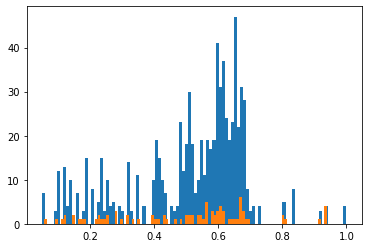

In [58]:
plt.hist(y_train,bins=100)
plt.hist(y_test,bins=100)